<font size=6><b> 데이콘 Basic 칼로리 소모량 예측 AI 경진대회

* ref : https://dacon.io/competitions/official/236097/overview/description

<pre>
ID : 샘플 별 고유 id
Exercise_Duration  : 운동 시간(분)
Body_Temperature(F) : 체온
BPM : 심박수
Height(Feet) : 키(피트)
Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
Weight(lb) : 몸무게(파운드)
Weight_Status : 체중 상태
Gender : 성별
Age : 나이
Calories_Burned : 칼로리 소모량(목표 예측값)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

sns.set() 
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'  # 한글 처리
plt.rcParams['axes.unicode_minus'] = False  # -, $ 등등에 표현 특수기호로 버리지 말고 다 써줘라.

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


# EDA

## Drop ID

In [4]:
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7500 non-null   float64
 1   Body_Temperature(F)       7500 non-null   float64
 2   BPM                       7500 non-null   float64
 3   Height(Feet)              7500 non-null   float64
 4   Height(Remainder_Inches)  7500 non-null   float64
 5   Weight(lb)                7500 non-null   float64
 6   Weight_Status             7500 non-null   object 
 7   Gender                    7500 non-null   object 
 8   Age                       7500 non-null   int64  
 9   Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 586.1+ KB


## hist, pair plot

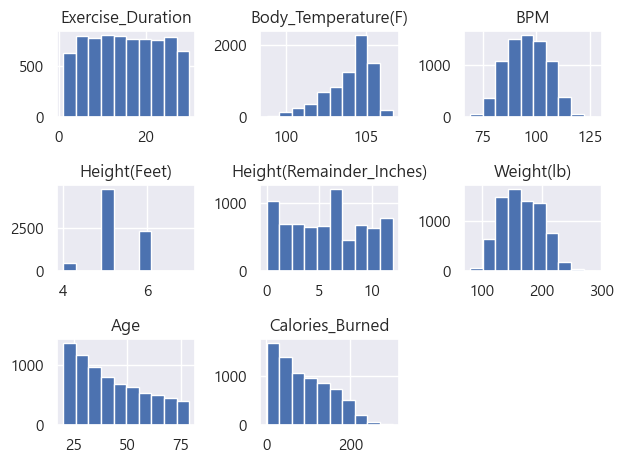

In [6]:
train.hist()
plt.tight_layout()
plt.show()

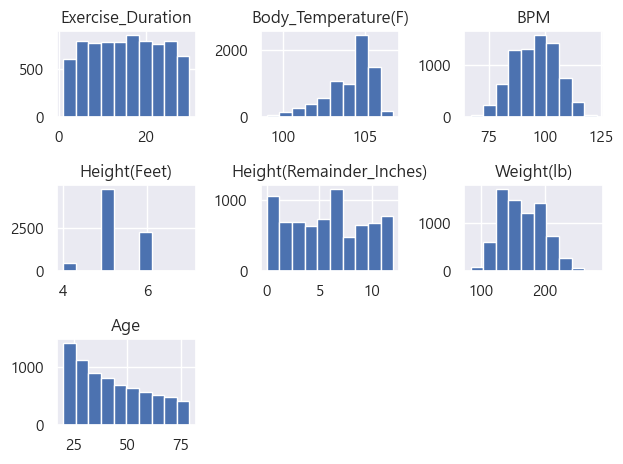

In [7]:
test.hist()
plt.tight_layout()
plt.show()

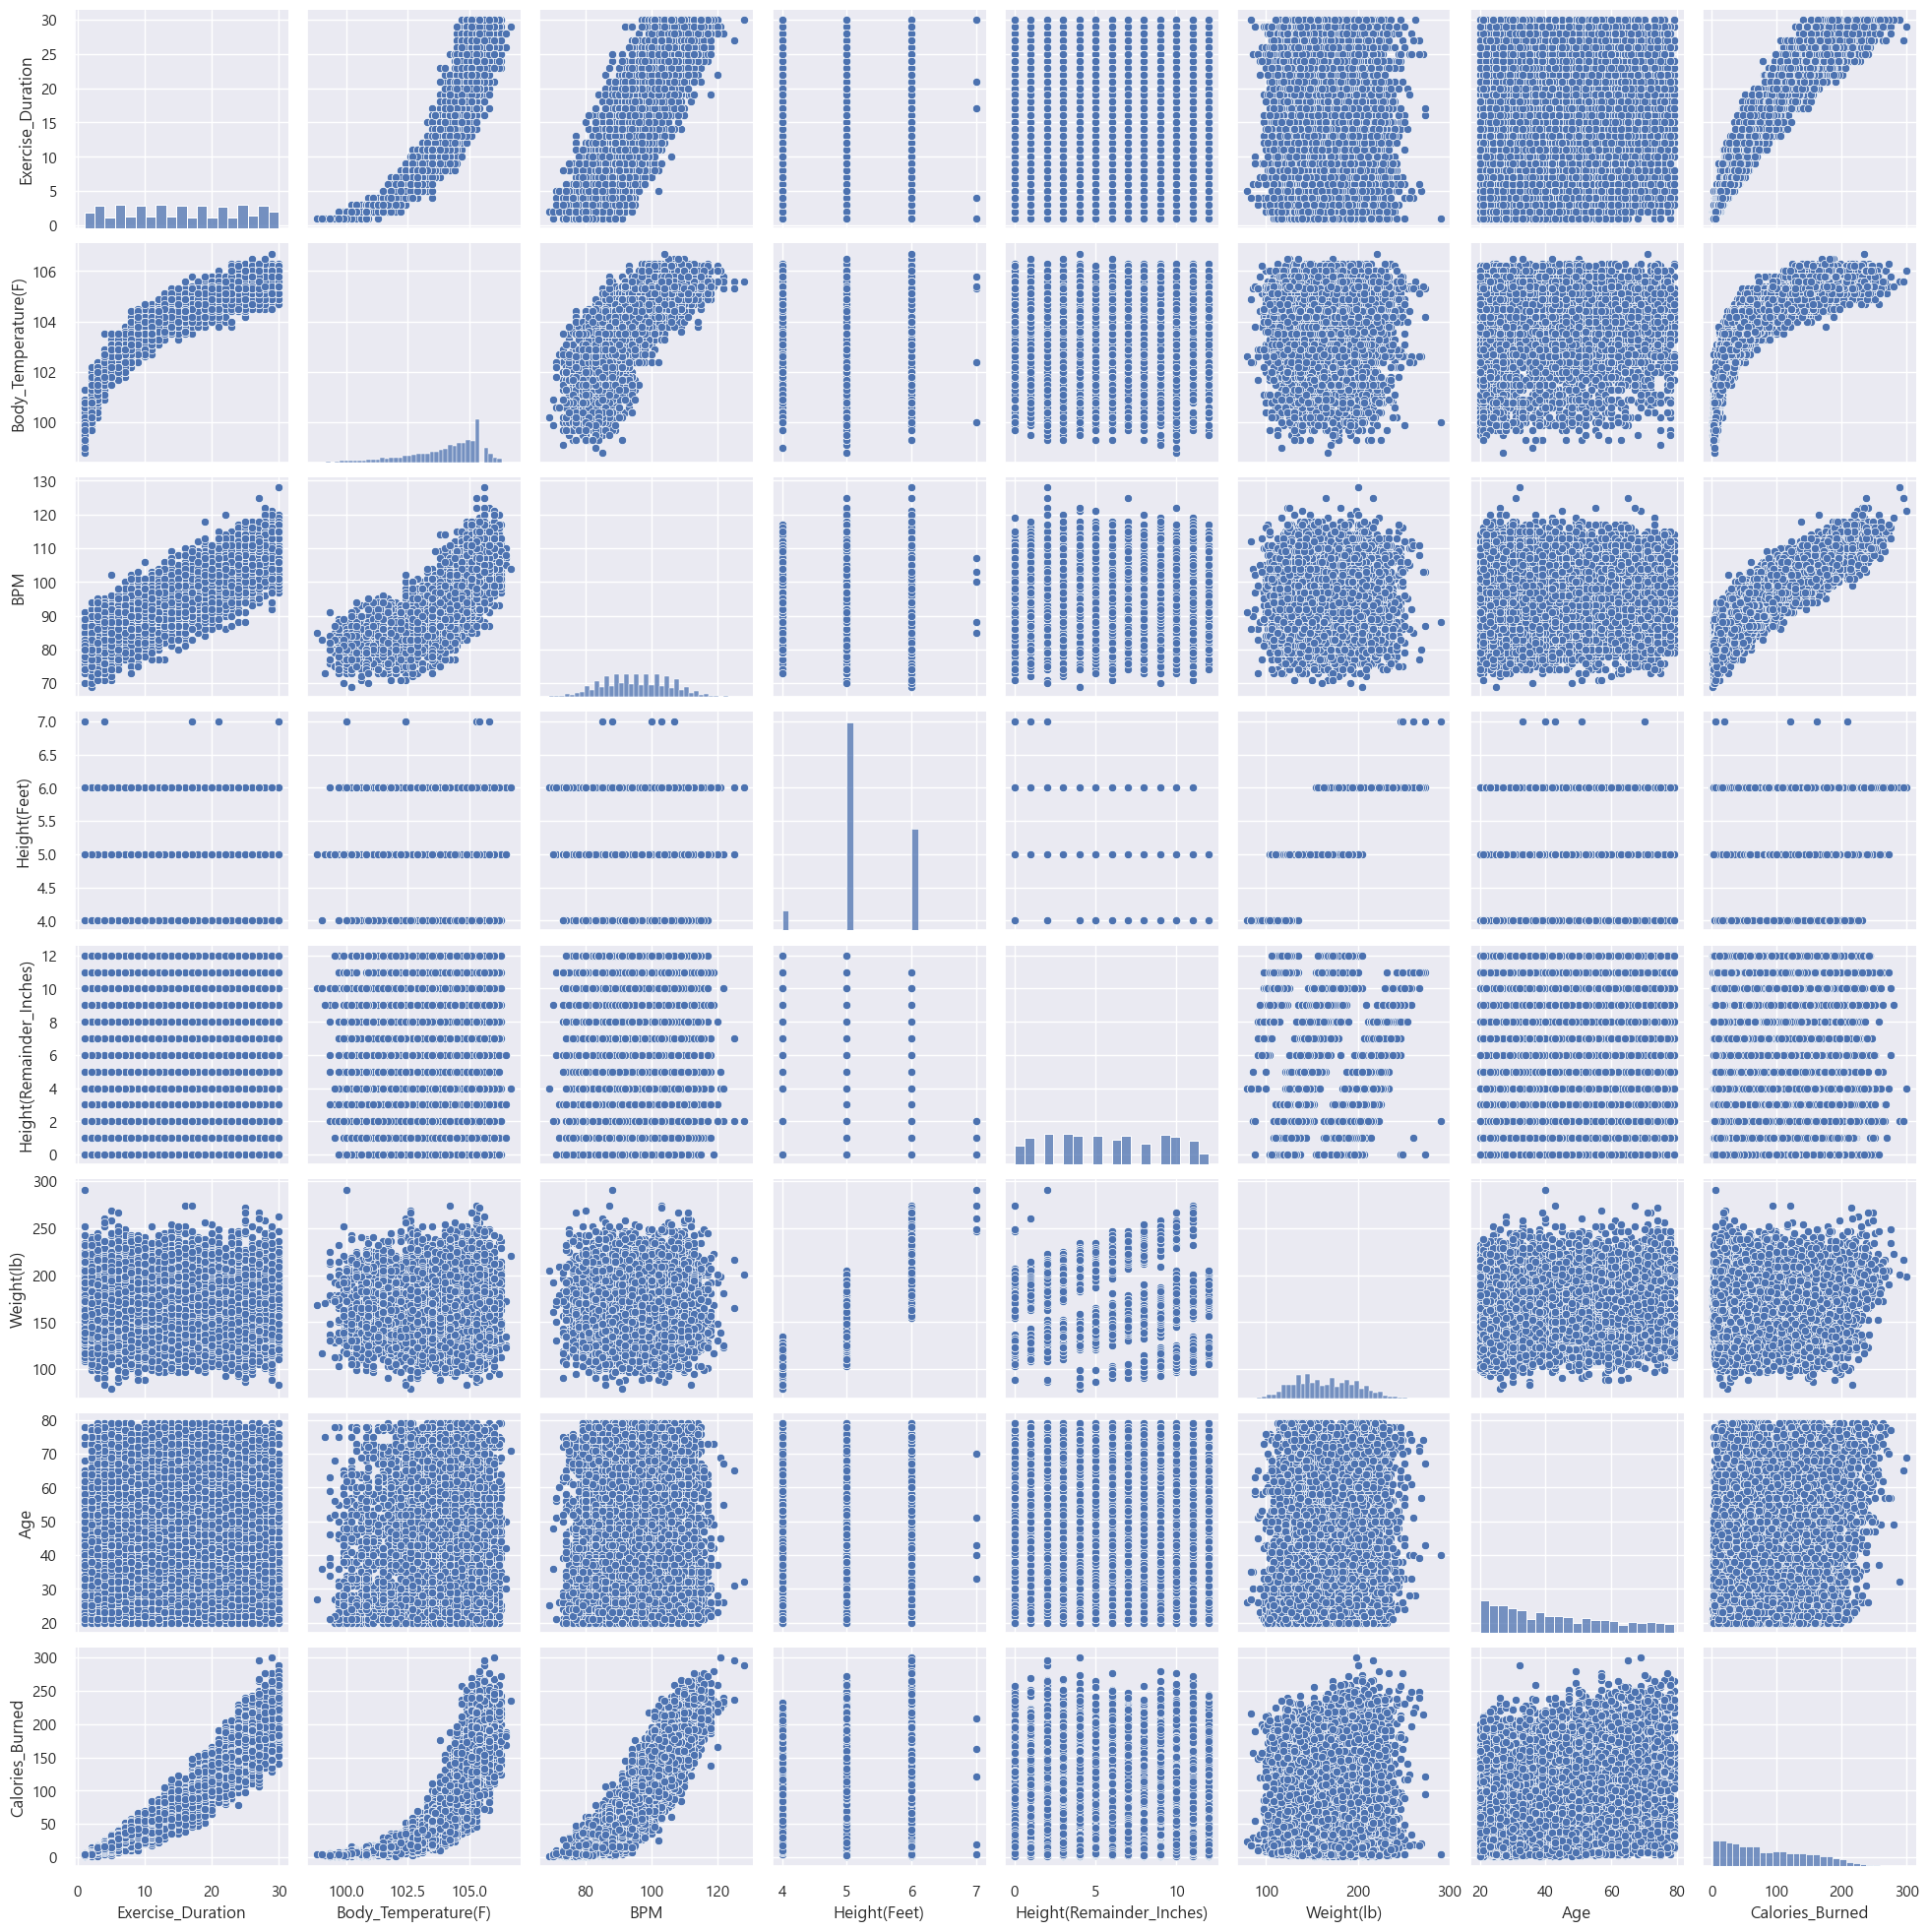

In [69]:
sns.pairplot(train)
plt.show()

## Height

In [8]:
train['Height(Inches)'] = train['Height(Feet)']*12
train['Height(Inches)'] = train['Height(Inches)'] + train['Height(Remainder_Inches)']

test['Height(Inches)'] = test['Height(Feet)']*12
test['Height(Inches)'] = test['Height(Inches)'] + test['Height(Remainder_Inches)']

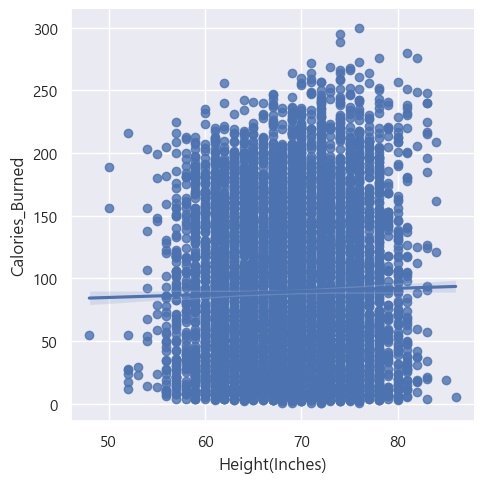

In [9]:
sns.lmplot(train, x = 'Height(Inches)', y='Calories_Burned')
plt.show()

## bmi

In [10]:
train['Height(m)'] = train['Height(Inches)']/39.37
test['Height(m)'] = test['Height(Inches)']/39.37

train['Weight(kg)'] = train['Weight(lb)']/2.205
test['Weight(kg)'] = test['Weight(lb)']/2.205

In [11]:
train['bmi'] = train['Weight(kg)']/(train['Height(m)']**2)
test['bmi'] = test['Weight(kg)']/(test['Height(m)']**2)

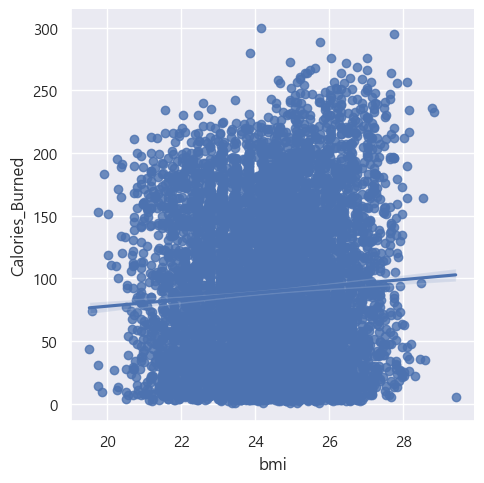

In [12]:
sns.lmplot(train, x = 'bmi', y='Calories_Burned')
plt.show()

## Weight_Status

In [13]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse=False)
oh.fit(train['Weight_Status'].values.reshape(-1,1))
temp = oh.transform(train['Weight_Status'].values.reshape(-1,1))
temp = pd.DataFrame(temp, columns=['Normal', 'Obese', 'OverWeight'])
train = pd.concat([train, temp], axis=1)

temp = oh.transform(test['Weight_Status'].values.reshape(-1,1))
temp = pd.DataFrame(temp, columns=['Normal', 'Obese', 'OverWeight'])
test = pd.concat([test, temp], axis=1)

## 상관관계

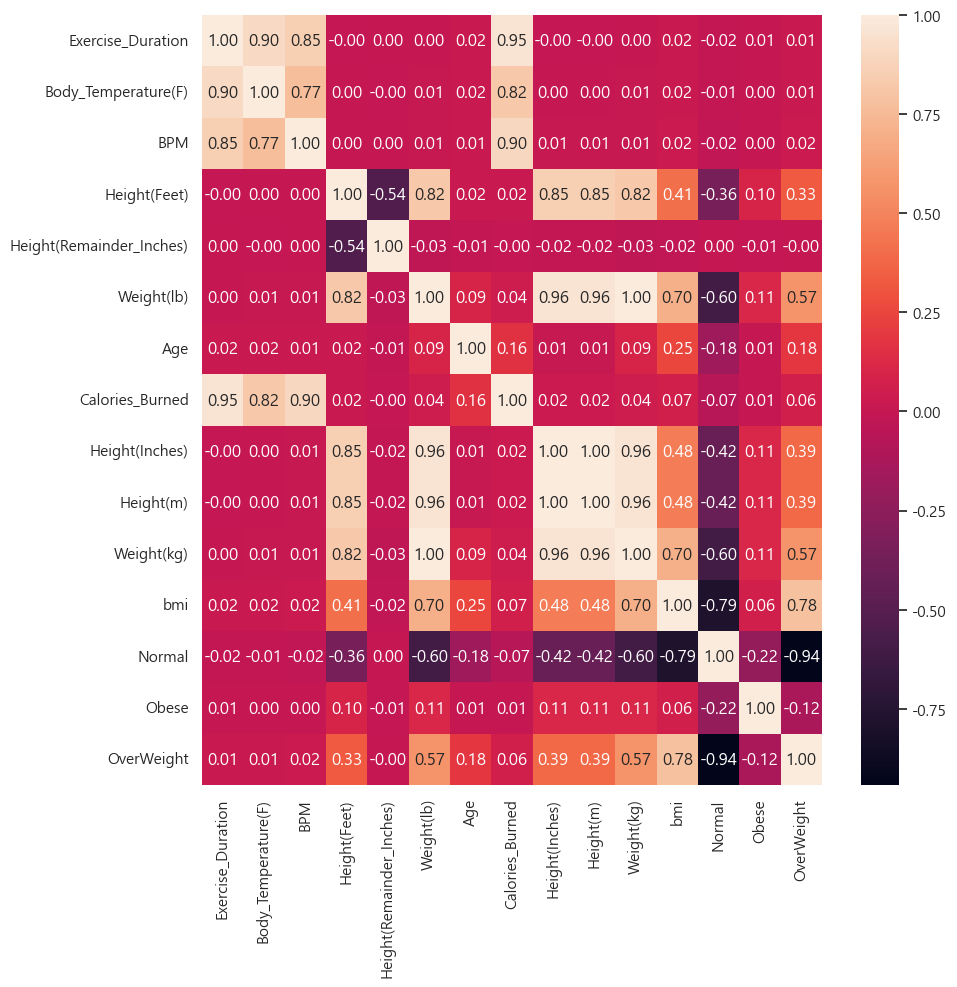

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), fmt='.2f',annot=True)
plt.show()

In [15]:
train.columns

Index(['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned', 'Height(Inches)', 'Height(m)', 'Weight(kg)',
       'bmi', 'Normal', 'Obese', 'OverWeight'],
      dtype='object')

In [16]:
train['Gender'] = train['Gender'].replace(['F','M'], [0, 1])
test['Gender'] = test['Gender'].replace(['F','M'], [0, 1])

# 파생변수 생성

In [37]:
min_ex = min(train['Exercise_Duration'])
max_ex = max(train['Exercise_Duration'])
ex_range = max_ex- min_ex
# min_ex, max_ex, ex_range
train['Exercise_gubun'] = pd.cut(train['Exercise_Duration'], [0, min_ex+(0.2*ex_range), min_ex+(0.4*ex_range), min_ex+(0.6*ex_range), min_ex+(0.8*ex_range), max_ex+10])
train['Exercise_gubun'] = train['Exercise_gubun'].astype('category').cat.codes

test['Exercise_gubun'] = pd.cut(test['Exercise_Duration'], [0, min_ex+(0.2*ex_range), min_ex+(0.4*ex_range), min_ex+(0.6*ex_range), min_ex+(0.8*ex_range), max_ex+10])
test['Exercise_gubun'] = test['Exercise_gubun'].astype('category').cat.codes

train['Exercise_gubun'].value_counts()

1    1572
2    1557
3    1518
4    1435
0    1418
Name: Exercise_gubun, dtype: int64

In [33]:
# 기초대사량 계산 Harris Benedict (해리스 베네딕트 방정식)
# 남자: 66.5 + (13.75 X 체중 kg) + (5.003 X 키 cm) - (6.75 X 나이)
# 여자: 655.1 + (9.563 X 체중 kg) + (1.850 X 키 cm) - (4.676 X 나이)

train['harris'] = np.where(train['Gender']==0, 655.1 + (9.563*train['Weight(kg)']) + (185 * train['Height(m)'])-(4.676*train['Age'])
                           , 66.5 + (13.75*train['Weight(kg)']) + (500.3 * train['Height(m)'])-(6.75*train['Age']))
test['harris'] = np.where(test['Gender']==0, 655.1 + (9.563*test['Weight(kg)']) + (185 * test['Height(m)'])-(4.676*test['Age'])
                           , 66.5 + (13.75*test['Weight(kg)']) + (500.3 * test['Height(m)'])-(6.75*test['Age']))

In [34]:
# 좌식(운동을 거의 또는 전혀 하지 않음): calories = BMR × 1.2;
# 가벼운 활동(가벼운 운동/스포츠 1-3일/주): calories = BMR × 1.375;
# 적당히 활동적(중간 정도의 운동/스포츠 3-5일/주): calories = BMR × 1.55;
# 매우 활동적(일주일에 6-7일 격렬한 운동/스포츠): calories = BMR × 1.725; 그리고
# 매우 활동적인 경우(매우 힘든 운동/스포츠 및 육체노동): calories = BMR × 1.9.

exidx = train[train['Exercise_gubun']==0].index
train.loc[exidx, 'harris'] = train.loc[exidx, 'harris']*1.2
exidx = train[train['Exercise_gubun']==1].index
train.loc[exidx, 'harris'] = train.loc[exidx, 'harris']*1.375
exidx = train[train['Exercise_gubun']==2].index
train.loc[exidx, 'harris'] = train.loc[exidx, 'harris']*1.55
exidx = train[train['Exercise_gubun']==3].index
train.loc[exidx, 'harris'] = train.loc[exidx, 'harris']*1.725
exidx = train[train['Exercise_gubun']==4].index
train.loc[exidx, 'harris'] = train.loc[exidx, 'harris']*1.9

In [38]:
exidx = test[test['Exercise_gubun']==0].index
test.loc[exidx, 'harris'] = test.loc[exidx, 'harris']*1.2
exidx = test[test['Exercise_gubun']==1].index
test.loc[exidx, 'harris'] = test.loc[exidx, 'harris']*1.375
exidx = test[test['Exercise_gubun']==2].index
test.loc[exidx, 'harris'] = test.loc[exidx, 'harris']*1.55
exidx = test[test['Exercise_gubun']==3].index
test.loc[exidx, 'harris'] = test.loc[exidx, 'harris']*1.725
exidx = test[test['Exercise_gubun']==4].index
test.loc[exidx, 'harris'] = test.loc[exidx, 'harris']*1.9

                   harris  Calories_Burned
harris           1.000000         0.579066
Calories_Burned  0.579066         1.000000


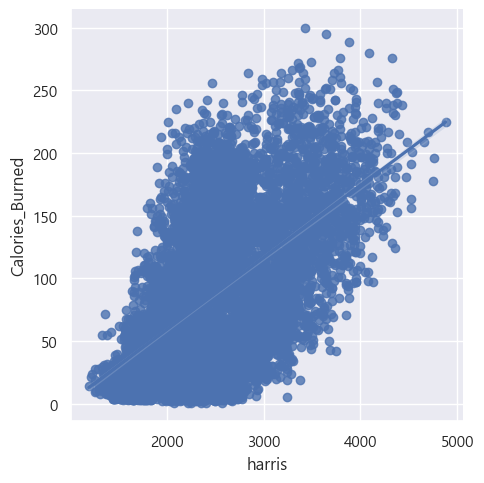

In [39]:
print(train[['harris','Calories_Burned']].corr())
sns.lmplot(train, x = 'harris', y='Calories_Burned')
plt.show()

In [40]:
# 미핀 세인트 젤(Mifflin St. Jeor) 방정식
# 남자: (10 X 체중 kg) + (6.25 X 키 cm) - (5 X 나이) + 5
# 여자: (10 X 체중 kg) + (6.25 X 키 cm) - (5 X 나이) - 161

train['mifflin'] = np.where(train['Gender']==0, (10*train['Weight(kg)']) + (625 * train['Height(m)'])-(5*train['Age'])-161
                           , (10*train['Weight(kg)']) + (625 * train['Height(m)'])-(5*train['Age'])+5)
test['mifflin'] = np.where(test['Gender']==0, (10*test['Weight(kg)']) + (625 * test['Height(m)'])-(5*test['Age'])-161
                           , (10*test['Weight(kg)']) + (625 * test['Height(m)'])-(5*test['Age'])+5)

In [41]:
exidx = train[train['Exercise_gubun']==0].index
train.loc[exidx, 'mifflin'] = train.loc[exidx, 'mifflin']*1.2
exidx = train[train['Exercise_gubun']==1].index
train.loc[exidx, 'mifflin'] = train.loc[exidx, 'mifflin']*1.375
exidx = train[train['Exercise_gubun']==2].index
train.loc[exidx, 'mifflin'] = train.loc[exidx, 'mifflin']*1.55
exidx = train[train['Exercise_gubun']==3].index
train.loc[exidx, 'mifflin'] = train.loc[exidx, 'mifflin']*1.725
exidx = train[train['Exercise_gubun']==4].index
train.loc[exidx, 'mifflin'] = train.loc[exidx, 'mifflin']*1.9

exidx = test[test['Exercise_gubun']==0].index
test.loc[exidx, 'mifflin'] = test.loc[exidx, 'mifflin']*1.2
exidx = test[test['Exercise_gubun']==1].index
test.loc[exidx, 'mifflin'] = test.loc[exidx, 'mifflin']*1.375
exidx = test[test['Exercise_gubun']==2].index
test.loc[exidx, 'mifflin'] = test.loc[exidx, 'mifflin']*1.55
exidx = test[test['Exercise_gubun']==3].index
test.loc[exidx, 'mifflin'] = test.loc[exidx, 'mifflin']*1.725
exidx = test[test['Exercise_gubun']==4].index
test.loc[exidx, 'mifflin'] = test.loc[exidx, 'mifflin']*1.9

                  mifflin    harris  Calories_Burned
mifflin          1.000000  0.993973         0.565462
harris           0.993973  1.000000         0.579066
Calories_Burned  0.565462  0.579066         1.000000


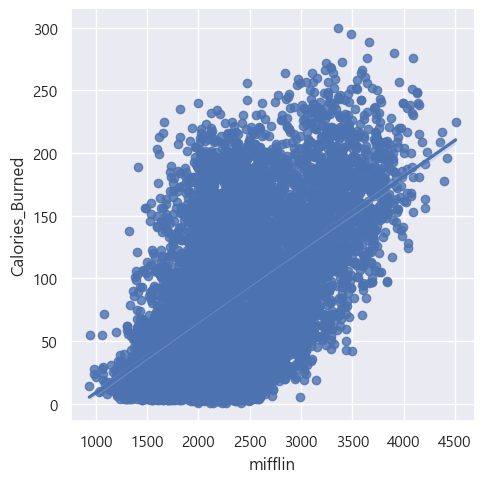

In [43]:
print(train[['mifflin','harris','Calories_Burned']].corr())
sns.lmplot(train, x = 'mifflin', y='Calories_Burned')
plt.show()

# Model Selection

In [ ]:
# from pycaret.regression import *

# col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
#        'bmi', 'Normal', 'Obese', 'OverWeight', 'Calories_Burned'] 
# train2 = train[col_list]
# s = setup(train2, target = 'Calories_Burned', silent=True, profile=True) #, feature_selection = True)
# best_model_list = compare_models(sort='MSE', n_select = 2, budget_time = 0.5)

In [ ]:
# models()

# 학습 및 검증

In [44]:
from sklearn.model_selection import cross_val_score, KFold

In [50]:
from xgboost import XGBRegressor

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight']  

trainX = train[col_list]
trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

testX = test[col_list]

model = XGBRegressor(random_state=11)

# train data score
kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_root_mean_squared_error', cv=kf)
print(f'scroe {-np.mean(score_list)}')

model.fit(trainX, trainy)
pred = model.predict(testX)
pred = np.expm1(pred)

# result = pd.read_csv('./datasets/sample_submission.csv')
# result['Calories_Burned'] = pred
# result.to_csv('./submit_v1.csv', index=False)

scroe 0.04005328699710682


In [51]:
from sklearn.preprocessing import StandardScaler

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight']  

ss = StandardScaler()

trainX = train[col_list]
ss.fit(trainX)
trainX = ss.transform(trainX)

trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

testX = test[col_list]
testX = ss.transform(testX)

model = XGBRegressor(random_state=11)


kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_root_mean_squared_error', cv=kf)
print(f'scroe {-np.mean(score_list)}')


model.fit(trainX, trainy)
pred = model.predict(testX)

pred = np.expm1(pred)

# result = pd.read_csv('./datasets/sample_submission.csv')
# result['Calories_Burned'] = pred
# result.to_csv('./submit_v2.csv', index=False)

scroe 0.040054022738745046


In [52]:
from catboost import CatBoostRegressor
import catboost as cb

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight']  

ss = StandardScaler()

trainX = train[col_list]
ss.fit(trainX)
trainX = ss.transform(trainX)

trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

testX = test[col_list]
testX = ss.transform(testX)

model = CatBoostRegressor(random_seed=11, loss_function='RMSE')

kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_root_mean_squared_error', cv=kf)
print(f'scroe {-np.mean(score_list)}')
# 0.02094423225763099

model.fit(trainX, trainy,  verbose=False)
pred = model.predict(testX)

pred = np.expm1(pred)

# result = pd.read_csv('./datasets/sample_submission.csv')
# result['Calories_Burned'] = pred
# result.to_csv('./submit_v3.csv', index=False)

Learning rate set to 0.054341
0:	learn: 0.9126561	total: 2.23ms	remaining: 2.23s
1:	learn: 0.8677572	total: 4.11ms	remaining: 2.05s
2:	learn: 0.8259780	total: 6.33ms	remaining: 2.1s
3:	learn: 0.7859924	total: 8.38ms	remaining: 2.09s
4:	learn: 0.7480286	total: 10.6ms	remaining: 2.1s
5:	learn: 0.7118735	total: 12.8ms	remaining: 2.12s
6:	learn: 0.6794592	total: 14.7ms	remaining: 2.08s
7:	learn: 0.6481284	total: 16.5ms	remaining: 2.04s
8:	learn: 0.6179875	total: 18.9ms	remaining: 2.08s
9:	learn: 0.5893672	total: 20.8ms	remaining: 2.06s
10:	learn: 0.5618794	total: 22.4ms	remaining: 2.02s
11:	learn: 0.5362649	total: 24.1ms	remaining: 1.99s
12:	learn: 0.5125057	total: 25.7ms	remaining: 1.95s
13:	learn: 0.4894121	total: 27.5ms	remaining: 1.94s
14:	learn: 0.4676767	total: 29.3ms	remaining: 1.92s
15:	learn: 0.4459489	total: 31ms	remaining: 1.9s
16:	learn: 0.4259308	total: 33.2ms	remaining: 1.92s
17:	learn: 0.4076056	total: 35.2ms	remaining: 1.92s
18:	learn: 0.3905309	total: 37ms	remaining: 1.91s

In [49]:
from catboost import CatBoostRegressor
import catboost as cb

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight','mifflin']  

trainX = train[col_list]
trainX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi','mifflin']]= np.log1p(trainX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi','mifflin']])

trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

testX = test[col_list]
testX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi','mifflin']]= np.log1p(testX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi','mifflin']])


model = CatBoostRegressor(random_seed=11, loss_function='RMSE')

kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_root_mean_squared_error', cv=kf)
print(f'scroe {-np.mean(score_list)}')

# 기본 0.02094423225763099
# harris 추가 0.021583909314204487
# mifline 추가 0.0212895818
# harris, mifline 둘다 추가 0.021181784015226524

model.fit(trainX, trainy,  verbose=False)
pred = model.predict(testX)

pred = np.expm1(pred)

# result = pd.read_csv('./datasets/sample_submission.csv')
# result['Calories_Burned'] = pred
# result.to_csv('./submit_v3.csv', index=False)

Learning rate set to 0.054341
0:	learn: 0.9141310	total: 2.23ms	remaining: 2.23s
1:	learn: 0.8688659	total: 3.99ms	remaining: 1.99s
2:	learn: 0.8267470	total: 5.88ms	remaining: 1.95s
3:	learn: 0.7878102	total: 7.95ms	remaining: 1.98s
4:	learn: 0.7507224	total: 10ms	remaining: 2s
5:	learn: 0.7154951	total: 12.5ms	remaining: 2.07s
6:	learn: 0.6818267	total: 14.6ms	remaining: 2.07s
7:	learn: 0.6497104	total: 17.6ms	remaining: 2.18s
8:	learn: 0.6205808	total: 19.7ms	remaining: 2.17s
9:	learn: 0.5932085	total: 21.6ms	remaining: 2.13s
10:	learn: 0.5662646	total: 23.7ms	remaining: 2.13s
11:	learn: 0.5401717	total: 25.6ms	remaining: 2.1s
12:	learn: 0.5170310	total: 28.7ms	remaining: 2.18s
13:	learn: 0.4935728	total: 30.7ms	remaining: 2.16s
14:	learn: 0.4719698	total: 32.5ms	remaining: 2.14s
15:	learn: 0.4522383	total: 34.5ms	remaining: 2.12s
16:	learn: 0.4323233	total: 36.6ms	remaining: 2.11s
17:	learn: 0.4127731	total: 38.4ms	remaining: 2.09s
18:	learn: 0.3946721	total: 40.1ms	remaining: 2.07

# AutoML

In [ ]:
import os

from supervised.automl import AutoML

col_list = ['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Weight(lb)', 'Gender', 'Age',  'Height(Inches)',
       'bmi', 'Normal', 'Obese', 'OverWeight']  

trainy = train['Calories_Burned']
trainy = np.log1p(trainy)

trainX = train[col_list]
trainX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi']]= np.log1p(trainX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi']])

testX = test[col_list]
testX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi']] = np.log1p(testX[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','Height(Inches)','bmi']])

automl = AutoML(mode="Compete", eval_metric='rmse')

automl.fit(trainX, trainy)

y_pred = automl.predict(testX)

y_pred = np.expm1(y_pred)

result = pd.read_csv('./datasets/sample_submission.csv')
result['Calories_Burned'] = y_pred
result.to_csv('./submit_v6.csv', index=False)